# 言語処理100本ノック　第4章 形態素解析

データのインストール


In [1]:
!wget https://nlp100.github.io/data/neko.txt

--2021-05-26 02:49:21--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.111.153, 185.199.108.153, 185.199.109.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.04s   

2021-05-26 02:49:21 (21.5 MB/s) - ‘neko.txt’ saved [975789/975789]



In [2]:
!head -30 ./neko.txt

一

　吾輩は猫である。
名前はまだ無い。

　どこで生れたかとんと見当がつかぬ。
何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
吾輩はここで始めて人間というものを見た。
しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。
この書生というのは時々我々を捕えて煮て食うという話である。
しかしその当時は何という考もなかったから別段恐しいとも思わなかった。
ただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである。
掌の上で少し落ちついて書生の顔を見たのがいわゆる人間というものの見始であろう。
この時妙なものだと思った感じが今でも残っている。
第一毛をもって装飾されべきはずの顔がつるつるしてまるで薬缶だ。
その後猫にもだいぶ逢ったがこんな片輪には一度も出会わした事がない。
のみならず顔の真中があまりに突起している。
そうしてその穴の中から時々ぷうぷうと煙を吹く。
どうも咽せぽくて実に弱った。
これが人間の飲む煙草というものである事はようやくこの頃知った。

　この書生の掌の裏でしばらくはよい心持に坐っておったが、しばらくすると非常な速力で運転し始めた。
書生が動くのか自分だけが動くのか分らないが無暗に眼が廻る。
胸が悪くなる。
到底助からないと思っていると、どさりと音がして眼から火が出た。
それまでは記憶しているがあとは何の事やらいくら考え出そうとしても分らない。

　ふと気が付いて見ると書生はいない。
たくさんおった兄弟が一疋も見えぬ。
肝心の母親さえ姿を隠してしまった。


MeCabをインストール

In [3]:
!apt-get -q -y install swig 
!apt-get install mecab
!apt-get install libmecab-dev
!apt-get install mecab-ipadic-utf8
!pip install mecab-python3

Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (861 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3

Mecabを用いて形態素解析

In [5]:
!mecab -o ./neko.txt.mecab ./neko.txt #-oは出力するファイル形式を指定。今回は、neko.txt.mecabとして出力。

In [6]:
!head -30 ./neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
とんと	副詞,一般,*,*,*,*,とんと,トント,トント


## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型(辞書)に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [7]:
data = open('./neko.txt.mecab', 'r') #'r':ファイルの読み込み　'w':書き込み
answer = []
onesentence = []

for line in data:
  
  if line == "EOS\n":#一文の終わりには必ず「EOS」がつく。
    answer.append(onesentence)
    onesentence = [] #onesentenseの初期化
  else:
    list = line.split()# 例：['吾輩', '名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ']
    
    if list!=[] and len(list)!=1:#改行文字を除外する
      morpheme_info = list[1].split(',')# 例['名詞', '代名詞', '一般', '*', '*', '*', '吾輩', 'ワガハイ', 'ワガハイ']
      
      if morpheme_info[0]!='': #['', '']を除外する
        morpheme = {
        'surface': list[0], 'base': morpheme_info[6], 'pos': morpheme_info[0], 'pos1': morpheme_info[1]
      }# 例：{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
        onesentence.append(morpheme)
        
for con in answer[5]:#結果の確認
    print(con)


    





{'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': '生れ', 'base': '生れる', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'か', 'base': 'か', 'pos': '助詞', 'pos1': '副助詞／並立助詞／終助詞'}
{'surface': 'とんと', 'base': 'とんと', 'pos': '副詞', 'pos1': '一般'}
{'surface': '見当', 'base': '見当', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': 'が', 'base': 'が', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'つか', 'base': 'つく', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'ぬ', 'base': 'ぬ', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [ ]:
#前問のanswerを用いる
answer31 = []
for onesentence in answer:
  for i in onesentence:
    if i['pos']=='動詞':#品詞(pos)が動詞のものを選択
      answer31.append(i['surface']) #動詞の表層形を追加
for i in answer31[0:30]:#確認
  print(i)

生れ
つか
し
泣い
し
いる
始め
見
聞く
捕え
煮
食う
思わ
載せ
られ
持ち上げ
られ
し
あっ
落ちつい
見
見
思っ
残っ
いる
さ
れ
し
逢っ
出会わ


## 32. 動詞の基本形
動詞の基本形をすべて抽出せよ．

In [ ]:
#前問のanswerを用いる
answer32 = []
for onesentence in answer:
  for i in onesentence:
    if i['pos']=='動詞':#品詞(pos)が動詞のものを選択
      answer32.append(i['base']) #動詞の基本形を追加
for i in answer32[0:30]:#確認
  print(i)

生れる
つく
する
泣く
する
いる
始める
見る
聞く
捕える
煮る
食う
思う
載せる
られる
持ち上げる
られる
する
ある
落ちつく
見る
見る
思う
残る
いる
する
れる
する
逢う
出会う


## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ

In [ ]:
#前問のanswerを用いる
answer33 = []

for onesentence in answer:
  for i in range(len(onesentence)):
    if i!=0 and i!=len(onesentence)-1:#文の最初と最後を外す
      if onesentence[i-1]['pos']=='名詞' and onesentence[i]['surface']=='の' and onesentence[i+1]['pos']=='名詞':#2つの名詞が「の」で連結されている名詞句を抽出
        answer33.append(onesentence[i-1]['surface']+onesentence[i]['surface']+onesentence[i+1]['surface'])  
  
for i in answer33[0:30]:#確認
  print(i)

彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中
書生の掌
掌の裏
何の事
肝心の母親
藁の上
笹原の中
池の前
池の上
一樹の蔭
垣根の穴
隣家の三
時の通路
一刻の猶予
家の内
彼の書生
以外の人間
前の書生
おさんの隙
おさんの三
胸の痞
家の主人
主人の方
鼻の下
吾輩の顔


## 34.  名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [ ]:
#前問のanswerを用いる
answer34 = []
Temporary =[]#仮のリスト
for onesentence in answer:
  for i in range(len(onesentence)):
      if onesentence[i]['pos']=='名詞':
        Temporary.append(onesentence[i]['surface'])#名詞を仮のリストに追加
      else:
        if len(Temporary) > 1:#名詞が2つ以上連結
          answer34.append(Temporary)#答えに追加
          Temporary = []#仮のリストを初期化
        else:#名詞が0か1
          Temporary = []  
  
for i in answer34[0:30]:#確認
  print(''.join(i))#join関数によってリストを文字列に変換
 

一吾輩
人間中
一番獰悪
時妙
一毛
その後猫
一度
ぷうぷうと煙
邸内
三毛
書生以外
四五遍
この間おさん
三馬
御台所
まま奥
住家
終日書斎
勉強家
勉強家
勤勉家
二三ページ
主人以外
限り吾輩
朝主人
一番心持
二人
一つ床
一人
最後大変


## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [8]:
#前問のanswerを用いる
answer35 = []
Temporary ={}#仮の辞書
for onesentence in answer:
  for i in range(len(onesentence)):
    if onesentence[i]['pos']!='記号' and onesentence[i]['base']!='*':#記号は単語ではない
        Temporary[onesentence[i]['base']] = Temporary.get(onesentence[i]['base'], 0)+1 #getメソッドの書式：辞書.get(key, keyがなかった時の値)


answer35=[(v, k) for k, v in Temporary.items()]
#print(type(answer35)) <class 'list'>
#print(answer35[0:5]) 例：[(554, '一'), (481, '吾輩'), (6420, 'は'), (248, '猫'), (3806, 'で')]
answer35.sort()#出現頻度が小さい順にソート
#print(answer35[0:5]) 例：[(1, '〇'), (1, 'あいだ'), (1, 'あう'), (1, 'あからさま'), (1, 'あかんべえ')]
answer35.reverse()#出現頻度が大きい順
#print(answer35[0:5]) 例：[(9194, 'の'), (6868, 'て'), (6420, 'は'), (6243, 'に'), (6071, 'を')]


for i,k in answer35[:30]:#確認
    print(i,k)


9194 の
6848 て
6420 は
6243 に
6071 を
5972 だ
5508 と
5337 が
4267 た
3657 する
3052 ない
2479 も
2320 ある
2084 で
2031 から
1777 いる
1568 ん
1529 か
1408 云う
1207 事
1164 です
1146 ます
1120 なる
1034 へ
987 う
981 もの
973 君
932 主人
719 ぬ
696 よう


## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

Matplotlibで日本語を使うために、japanize_matplotlibをインストール

In [9]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 7.7MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=1965ac6e599c0c58c5493e7ec7fe3a5f886a98df0052699becbaa60bba4a34a0
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


9194 の
6848 て
6420 は
6243 に
6071 を
5972 だ
5508 と
5337 が
4267 た
3657 する


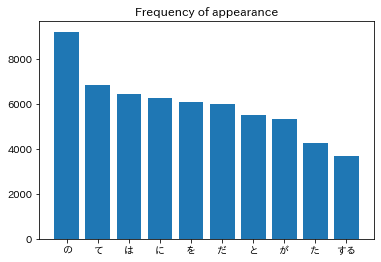

In [13]:
import matplotlib.pyplot as plt
import japanize_matplotlib


#前問のanswer35を用いる
answer36 = answer35[0:10]
for i,k in answer36:#確認
    print(i,k)
labels = []#横軸のラベル
y = []#y軸
for i in answer36:
  labels.append(i[1])
  y.append(i[0])
x = range(0, 10) #x軸
#print(y) y=[9194, 6848, 6420, 6243, 6071, 5972, 5508, 5337, 4267, 3657]
#print(labels) labels=['の', 'て', 'は', 'に', 'を', 'だ', 'と', 'が', 'た', 'する']

#棒グラフを描画する
plt.bar(x, y, tick_label = labels)#bar()はx軸とy軸の情報から棒グラフを作成、tick_labelは横軸のラベルを指定
plt.title("Frequency of appearance")#タイトル「出現頻度」
plt.show()#プロット表示




## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ

144 する
58 いる
55 ある
38 云う
35 見る
33 なる
26 思う
25 れる
17 出来る
16 いう


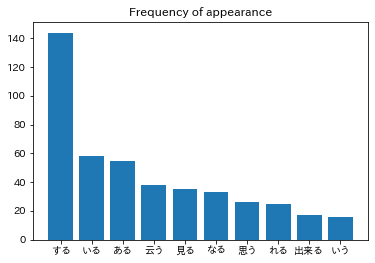

In [14]:
#「猫」と共起する＝「猫」と同じ文中に出現する
#前問のanswerを利用
answer37 = []
Temporary ={}#仮の辞書

#「猫」が出現する文だけを辞書に追加
for onesentence in answer:
  for i in onesentence:
      if i['surface']=='猫':
        answer37.append(onesentence)
        break
      
for sentence in answer37:
  for i in sentence:
    if i['pos']=='動詞' and i['base']!='*' and i['surface']!='猫':#記号は単語ではない
        Temporary[i['base']] = Temporary.get(i['base'], 0)+1 #getメソッドの書式：辞書.get(key, keyがなかった時の値)


answer37=[(v, k) for k, v in Temporary.items()]
answer37.sort()#出現頻度が小さい順にソート
answer37.reverse()#出現頻度が大きい順

import matplotlib.pyplot as plt
import japanize_matplotlib

labels = []#横軸のラベル
y = []#y軸
for i in answer37[0:10]:
  print(i[0], i[1])
  labels.append(i[1])
  y.append(i[0])
x = range(10) #x軸

#棒グラフを描画する
plt.bar(x, y, tick_label = labels)#bar()はx軸とy軸の情報から棒グラフを作成、tick_labelは横軸のラベルを指定
plt.title("Frequency of appearance")#タイトル「出現頻度」
plt.show()#プロット表示


## 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

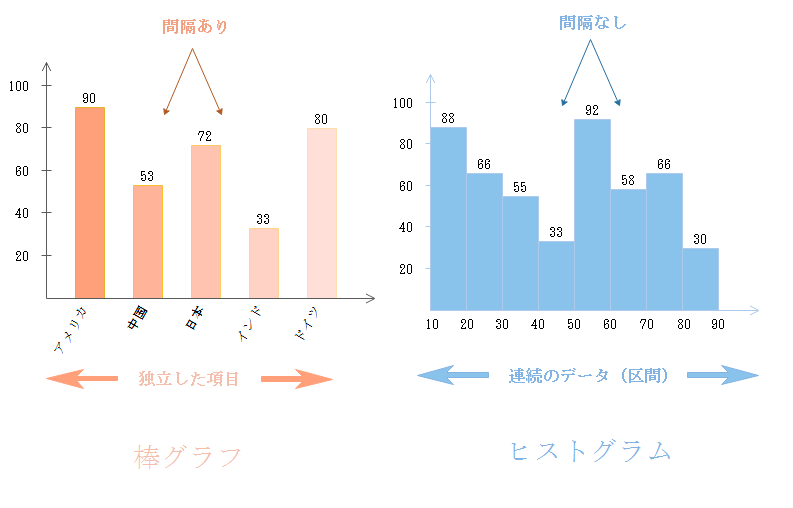

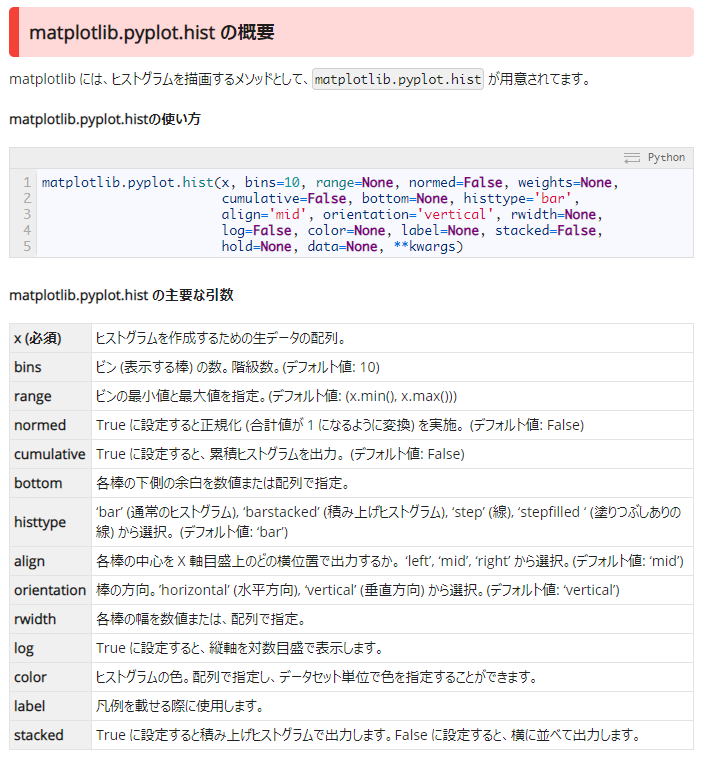

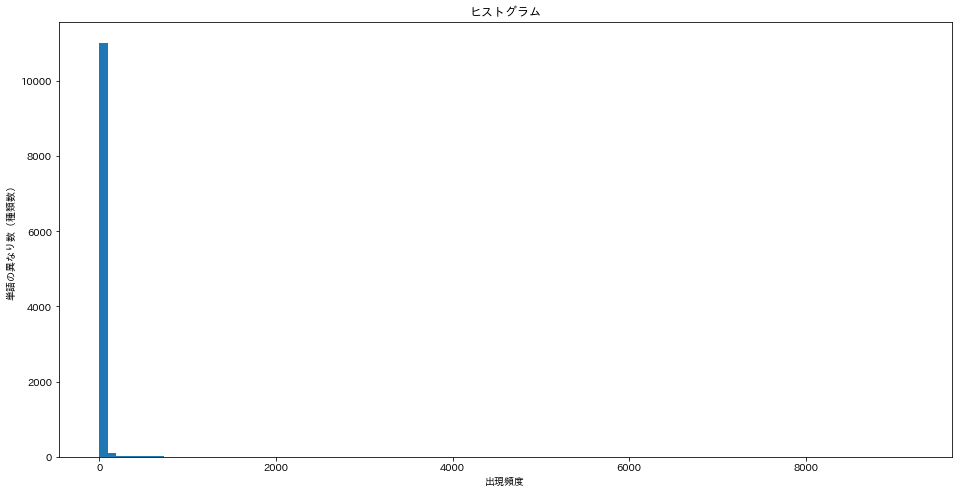

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

#前問のanswer35を用いる
x = [i[0] for i in answer35]#ヒストグラム作成用の出現頻度のデータ配列を作成する

plt.figure(figsize=(16, 8))
plt.hist(x,bins=100)
plt.title('ヒストグラム')
plt.xlabel('出現頻度')
plt.ylabel('単語の異なり数（種類数）')
plt.show()


## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ

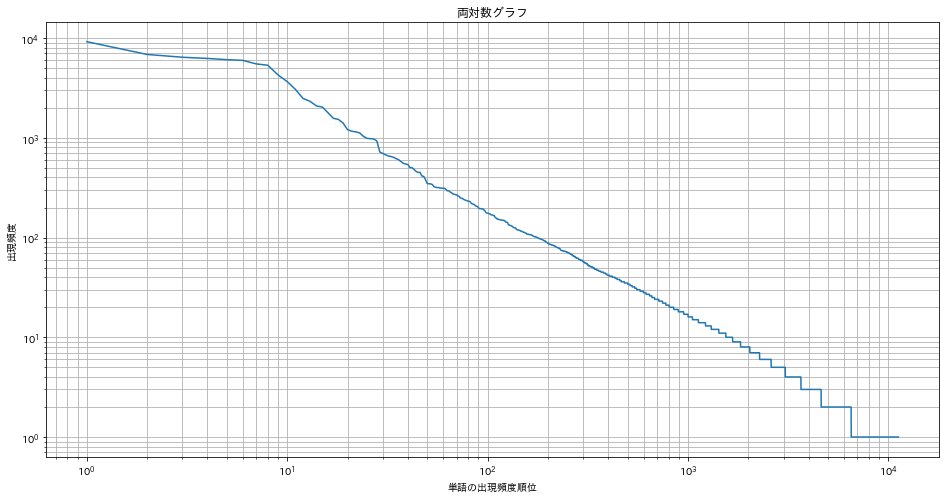

In [17]:
#前問のanswer35を用いる
x = [i+1 for i in range(len(answer35))]#x軸は単語の出現頻度順位
#print(x[0:10]) 例：[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [i[0] for i in answer35]#y軸は出現頻度
#print(y[0:10]) 例：[9194, 6848, 6420, 6243, 6071, 5972, 5508, 5337, 4267, 3657]

plt.figure(figsize=(16, 8))
plt.plot(x, y) 
plt.xscale('log') #plt.xscale('log')でx軸を対数表示
plt.yscale('log') #plt.yscale('log')でy軸を対数表示
plt.grid(which="both")
plt.title('両対数グラフ')
plt.xlabel('単語の出現頻度順位')
plt.ylabel('出現頻度')
plt.show()